Author: Tomasz Świątek

# Valuation of shares of selected companies

## 0. Uploading and analysis of the company data set 

### 0.1 Uploading a file with company data 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
file = pd.ExcelFile('Companies for valuation.xlsx') #loading the file  .xls
df = file.parse('Data', names = ['Company', 'Report', 'Price', 'Number of shares [in thous.]', 
                                 'Average cash flow [in thous. PLN]', 'Net profit [%]', 'Market',
                                 'Sector', 'Industry', 'Book value per share 5 years (average) [%]',
                                 'Price / Book Value', 'Price / Profit', 'ROE [%]']) #convert excel table into data frame 

df.head()

,Company,Report,Price,Number of shares [in thous.],Average cash flow [in thous. PLN],Net profit [%],Market,Sector,Industry,Book value per share 5 years (average) [%],Price / Book Value,Price / Profit,ROE [%]
0,08N (08OCTAVA),2020/Q3,1,42787,-5021,0.897,GPW,GPW: Deweloperzy,Nieruchomości,0.01,0.69,9.07,0.0758
1,11B (11BIT),2020/Q3,519,2361,66391,1.2993,GPW,GPW: Informatyka,Gry,0.41,7.66,27.84,0.2751
2,1AT (ATAL),2020/Q3,43.6,38715,-26997,0.2213,GPW,GPW: Deweloperzy,Nieruchomości,0.08,1.92,13.14,0.1464
3,7FT (7FIT),2020/Q4,3.9,1793,-56,0.5819,NC,NC: Handel,Sieci handlowe,0.32,2.61,8.72,0.2994
4,7LV (7LEVELS),2020/Q4,30.6,575,1387,1.019,NC,NC: Informatyka,Gry,0.74,7.45,1380.56,0.0054


### 0.2 Data set analysis 

In [5]:
#Check data lack
df.isnull().sum()

Company                                       0
Report                                        0
Price                                         0
Number of shares [in thous.]                  0
Average cash flow [in thous. PLN]             0
Net profit [%]                                0
Market                                        0
Sector                                        0
Industry                                      0
Book value per share 5 years (average) [%]    0
Price / Book Value                            0
Price / Profit                                0
ROE [%]                                       0
dtype: int64

In [6]:
#Change NaN value to 0
df.fillna(value=0, inplace=True)

In [7]:
#Checking the number of duplicates 
df.duplicated().sum()

12

In [8]:
#Removal of duplicates 
if df.duplicated().sum() > 0:
    df.drop_duplicates(inplace = True)

In [9]:
#Checking indexes
df.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            419, 420, 421, 422, 423, 424, 425, 426, 427, 428],
           dtype='int64', length=417)

In [10]:
#Checking if the company name is unique and can be an index
df.Company.is_unique

True

In [11]:
#Setting the 'Company' column as an index 
df.set_index('Company', inplace=True)

In [12]:
#Deletion of rows with duplicate column names 
df.drop('Profil', axis=0, inplace = True)

In [13]:
print ('Number of companies:',df.shape[0],'\n')
print ('Number of attributes:',df.shape[1])

Number of companies: 416 

Number of attributes: 12


In [14]:
#Attribute types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 416 entries, 08N (08OCTAVA) to ZWC (ZYWIEC)
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Report                                      416 non-null    object
 1   Price                                       416 non-null    object
 2   Number of shares [in thous.]                416 non-null    object
 3   Average cash flow [in thous. PLN]           416 non-null    object
 4   Net profit [%]                              416 non-null    object
 5   Market                                      416 non-null    object
 6   Sector                                      416 non-null    object
 7   Industry                                    416 non-null    object
 8   Book value per share 5 years (average) [%]  416 non-null    object
 9   Price / Book Value                          416 non-null    object
 10  Price / P

In [15]:
#Convert columns to numeric 

df["Price"] = pd.to_numeric(df["Price"])
df["Number of shares [in thous.]"] = pd.to_numeric(df["Number of shares [in thous.]"])
df["Average cash flow [in thous. PLN]"] = pd.to_numeric(df["Average cash flow [in thous. PLN]"])
df["Net profit [%]"] = pd.to_numeric(df["Net profit [%]"])*100 #Conversion of the percentages 
df["Book value per share 5 years (average) [%]"] = pd.to_numeric(df["Book value per share 5 years (average) [%]"])*100 #Zamiana na procenty
df["Price / Book Value"] = pd.to_numeric(df["Price / Book Value"])
df["Price / Profit"] = pd.to_numeric(df["Price / Profit"])
df["ROE [%]"] = pd.to_numeric(df["ROE [%]"])*100 #Conversion of the percentages 

In [16]:
df.head()

,Report,Price,Number of shares [in thous.],Average cash flow [in thous. PLN],Net profit [%],Market,Sector,Industry,Book value per share 5 years (average) [%],Price / Book Value,Price / Profit,ROE [%]
Company,,,,,,,,,,,,
08N (08OCTAVA),2020/Q3,1.0,42787,-5021,89.70,GPW,GPW: Deweloperzy,Nieruchomości,1.0,0.69,9.07,7.58
11B (11BIT),2020/Q3,519.0,2361,66391,129.93,GPW,GPW: Informatyka,Gry,41.0,7.66,27.84,27.51
1AT (ATAL),2020/Q3,43.6,38715,-26997,22.13,GPW,GPW: Deweloperzy,Nieruchomości,8.0,1.92,13.14,14.64
7FT (7FIT),2020/Q4,3.9,1793,-56,58.19,NC,NC: Handel,Sieci handlowe,32.0,2.61,8.72,29.94
7LV (7LEVELS),2020/Q4,30.6,575,1387,101.90,NC,NC: Informatyka,Gry,74.0,7.45,1380.56,0.54


In [17]:
#Statistical indicators
df.describe()

,Price,Number of shares [in thous.],Average cash flow [in thous. PLN],Net profit [%],Book value per share 5 years (average) [%],Price / Book Value,Price / Profit,ROE [%]
count,416.000000,4.160000e+02,4.160000e+02,416.000000,416.000000,416.000000,416.000000,416.000000
mean,34.824038,7.942830e+04,-1.643204e+03,662.508341,6.841346,3.651298,67.670264,19.410240
std,95.202642,3.567659e+05,4.602802e+05,4368.007209,21.031791,12.507402,308.770279,31.193211
min,0.010000,1.640000e+02,-4.959000e+06,-110.760000,-59.000000,0.030000,0.230000,0.080000
25%,2.305000,5.517250e+03,-3.075000e+01,-14.002500,0.000000,0.827500,8.067500,5.827500
50%,7.150000,1.389300e+04,1.255000e+03,51.155000,5.000000,1.505000,14.385000,11.220000
75%,23.825000,4.117525e+04,1.057400e+04,176.677500,11.000000,2.982500,27.852500,20.590000
max,807.000000,5.778315e+06,4.407000e+06,55300.000000,144.000000,233.530000,4145.390000,323.880000


## 1. Method based on discounted cash flow (DCF)

Discounted cash flow (DCF) is one of the methods used to value an investment, company or other asset based on its expected future cash flows and changes in the value of money over time. The purpose of this method is to estimate and discount all future cash flows to determine their present value. The discount rate level is the cost of capital and takes into account the risk assessment regarding future cash flows.<br>
The discounted cash flow method is widely used in the areas of financial investment analysis, real estate development and corporate management. The calculations given in the project are based on this method and adapted to the market environment based on personal experience.

### 1.1 Parameters of the companies

In [18]:
#Selection of companies only with positive cash flows and profit growth 
df = df[ (df['Average cash flow [in thous. PLN]'] > 0) & (df['Net profit [%]'] > 0 ) ]
df.sample(5)

,Report,Price,Number of shares [in thous.],Average cash flow [in thous. PLN],Net profit [%],Market,Sector,Industry,Book value per share 5 years (average) [%],Price / Book Value,Price / Profit,ROE [%]
Company,,,,,,,,,,,,
MOJ,2020/Q3,1.99,9827,60,15.69,GPW,GPW: Przemysł elektromaszynowy,Przemysł elektromaszynowy,4.0,0.43,5.09,8.44
NVA (PANOVA),2020/Q3,14.60,10000,10509,5.23,GPW,GPW: Budownictwo,Budownictwo,6.0,0.37,5.88,6.30
OZE (OZECAPITAL),2020/Q4,3.24,32400,302,108.78,NC,NC: Eco-energia,Motoryzacja,22.0,1.24,3.59,34.45
ATA (ATCCARGO),2020/Q4,6.40,6631,2742,59.17,NC,NC: Usługi inne,Transport i logistyka,10.0,1.47,7.09,20.68
AFH (AFHOL),2020/Q4,8.35,9043,1384,124.19,NC,NC: Usługi finansowe,Pośrednictwo finansowe,37.0,3.45,20.44,16.86


- The current market price 

In [19]:
df['Price']

Company
11B (11BIT)        519.00
7LV (7LEVELS)       30.60
ABE (ABPL)          47.90
ABK (ABAK)           3.38
ACA (ACARTUS)        0.61
                    ...  
XPL (XPLUS)          3.42
XTB                 17.00
ZRE (ZREMB)          1.20
ZUE                  5.35
ZUK (STAPORKOW)      3.64
Name: Price, Length: 226, dtype: float64

- Number of shares

In [20]:
df['Number of shares [in thous.]']

Company
11B (11BIT)          2361
7LV (7LEVELS)         575
ABE (ABPL)          16188
ABK (ABAK)           2695
ACA (ACARTUS)        7499
                    ...  
XPL (XPLUS)         67347
XTB                117384
ZRE (ZREMB)         12600
ZUE                 23030
ZUK (STAPORKOW)      6504
Name: Number of shares [in thous.], Length: 226, dtype: int64

- Average cash flow

In [21]:
df['Average cash flow [in thous. PLN]']

Company
11B (11BIT)        66391
7LV (7LEVELS)       1387
ABE (ABPL)         47754
ABK (ABAK)          1049
ACA (ACARTUS)        242
                   ...  
XPL (XPLUS)         1942
XTB                52063
ZRE (ZREMB)          372
ZUE                12973
ZUK (STAPORKOW)     3862
Name: Average cash flow [in thous. PLN], Length: 226, dtype: int64

- The change of profit (in the selected period of growth) 

In [22]:
df['Net profit [%]']

Company
11B (11BIT)        129.93
7LV (7LEVELS)      101.90
ABE (ABPL)          64.00
ABK (ABAK)         240.42
ACA (ACARTUS)        4.47
                    ...  
XPL (XPLUS)         80.95
XTB                596.85
ZRE (ZREMB)         41.15
ZUE                104.49
ZUK (STAPORKOW)     68.88
Name: Net profit [%], Length: 226, dtype: float64

- Change in profit after a selected period (assumed decrease by 50%, additional cash flows after a period of strong growth) 

In [23]:
df['Net profit [%]'] / 2

Company
11B (11BIT)         64.965
7LV (7LEVELS)       50.950
ABE (ABPL)          32.000
ABK (ABAK)         120.210
ACA (ACARTUS)        2.235
                    ...   
XPL (XPLUS)         40.475
XTB                298.425
ZRE (ZREMB)         20.575
ZUE                 52.245
ZUK (STAPORKOW)     34.440
Name: Net profit [%], Length: 226, dtype: float64

### 1.2 Valuation parameters 

- Number of years (base investment period) 

In [24]:
y=10

- Number of additional years (assumed additional investment period) 

In [25]:
ya=20

- Discounting (approximate value, based on cost of capital) 

In [26]:
d=0.1

### 1.3 Calculation of the DFCF

In [27]:
def flows(data):
    
    #Sum of discounted cash flows in the base period 
    cf = 0
    cfl = [0]
    dfcf = 0
    dfcft = 0
    dpcf = 0
    dpcft = 0
    
    for i in range(1, y + 1):
        cf = data['Average cash flow [in thous. PLN]'] * 1000 * (1 + data['Net profit [%]'] / 100) ** i;   #cash flows in the following years 
        cfl.append(cf)     #adding flows to the list 

        dfcf = cf / (( 1 + d) ** i) #discounted flows in the following years 
        dfcft = dfcft + dfcf;       #sum of discounted cash flows 
        
    
    #The sum of discounted cash flows in the additional period 
    
    for i in range(1, ya + 1):
        pcf = cfl[y] * (1 + (data['Net profit [%]'] / 100) / 2) ** i  #cash flows in subsequent years, starting from the end of the analyzed period, the assumed increase in profit is lower by 50% 
  
        dpcf = pcf / ((1 + d) ** (i + y)) #discounted flows in subsequent years, starting from the end of the analyzed period 
        dpcft = dpcft + dpcf;      #sum of discounted cash flows    
            
    return round(dfcft + dpcft, 2);
   
df['Sum of discounted flows DFCF+DPCF'] = df.apply(flows, axis=1); #adding a new column
df.head(5)

,Report,Price,Number of shares [in thous.],Average cash flow [in thous. PLN],Net profit [%],Market,Sector,Industry,Book value per share 5 years (average) [%],Price / Book Value,Price / Profit,ROE [%],Sum of discounted flows DFCF+DPCF
Company,,,,,,,,,,,,,
11B (11BIT),2020/Q3,519.00,2361,66391,129.93,GPW,GPW: Informatyka,Gry,41.0,7.66,27.84,27.51,1.050460e+15
7LV (7LEVELS),2020/Q4,30.60,575,1387,101.90,NC,NC: Informatyka,Gry,74.0,7.45,1380.56,0.54,1.243331e+12
ABE (ABPL),2020/Q2,47.90,16188,47754,64.00,GPW,GPW: Handel hurtowy,Handel hurtowy,11.0,0.82,7.67,10.74,5.882474e+11
ABK (ABAK),2020/Q4,3.38,2695,1049,240.42,NC,NC: Usługi finansowe,Usługi dla przedsiębiorstw,11.0,2.41,9.90,24.31,1.805104e+17
ACA (ACARTUS),2020/Q4,0.61,7499,242,4.47,NC,NC: Usługi finansowe,Usługi dla przedsiębiorstw,-4.0,3.87,14.80,26.16,3.304600e+06


### 1.4 Company valuation

- Intrinsic value per share over the entire investment period 

In [28]:
def value(data):
    iv = data['Sum of discounted flows DFCF+DPCF'] / data['Number of shares [in thous.]'] * 1000;
    return round(iv, 2);
    
df['Intrinsic value per share - DCF'] = df.apply(value, axis=1);    #adding a new column   


- Growth potential (acceptable level above 100%) 

In [29]:
def growth(data):
    r = (data['Intrinsic value per share - DCF'] - data['Price']) / data['Price'] * 100;
    return round(r, 2);
        
df['Growth potential - DCF %'] = df.apply(growth, axis=1)    #adding a new column    


- Average annual return 

In [30]:
def ave_annual_return(data):
    ar = ((1 + data['Growth potential - DCF %'] / 100) ** (1 / (y + ya)) - 1) * 100;
    return round(ar, 2);
         
df['Average annual return - DCF %'] = df.apply(ave_annual_return, axis=1)    #adding a new column      


In [31]:
df.head(5)

,Report,Price,Number of shares [in thous.],Average cash flow [in thous. PLN],Net profit [%],Market,Sector,Industry,Book value per share 5 years (average) [%],Price / Book Value,Price / Profit,ROE [%],Sum of discounted flows DFCF+DPCF,Intrinsic value per share - DCF,Growth potential - DCF %,Average annual return - DCF %
Company,,,,,,,,,,,,,,,,
11B (11BIT),2020/Q3,519.00,2361,66391,129.93,GPW,GPW: Informatyka,Gry,41.0,7.66,27.84,27.51,1.050460e+15,4.449215e+14,8.572669e+13,149.90
7LV (7LEVELS),2020/Q4,30.60,575,1387,101.90,NC,NC: Informatyka,Gry,74.0,7.45,1380.56,0.54,1.243331e+12,2.162314e+12,7.066386e+12,129.95
ABE (ABPL),2020/Q2,47.90,16188,47754,64.00,GPW,GPW: Handel hurtowy,Handel hurtowy,11.0,0.82,7.67,10.74,5.882474e+11,3.633848e+10,7.586322e+10,97.70
ABK (ABAK),2020/Q4,3.38,2695,1049,240.42,NC,NC: Usługi finansowe,Usługi dla przedsiębiorstw,11.0,2.41,9.90,24.31,1.805104e+17,6.697975e+16,1.981649e+18,249.33
ACA (ACARTUS),2020/Q4,0.61,7499,242,4.47,NC,NC: Usługi finansowe,Usługi dla przedsiębiorstw,-4.0,3.87,14.80,26.16,3.304600e+06,4.406721e+05,7.224123e+07,56.78


### 1.5 Summary of the results of the discounted cash flow (DCF) method 

In [32]:
df[['Price','Intrinsic value per share - DCF',
    'Growth potential - DCF %','Average annual return - DCF %']]

,Price,Intrinsic value per share - DCF,Growth potential - DCF %,Average annual return - DCF %
Company,,,,
11B (11BIT),519.00,4.449215e+14,8.572669e+13,149.90
7LV (7LEVELS),30.60,2.162314e+12,7.066386e+12,129.95
ABE (ABPL),47.90,3.633848e+10,7.586322e+10,97.70
ABK (ABAK),3.38,6.697975e+16,1.981649e+18,249.33
ACA (ACARTUS),0.61,4.406721e+05,7.224123e+07,56.78
...,...,...,...,...
XPL (XPLUS),3.42,2.557995e+09,7.479518e+10,97.60
XTB,17.00,9.633366e+24,5.666686e+25,519.12
ZRE (ZREMB),1.20,2.295724e+07,1.913103e+09,74.87


In [33]:
df[['Price','Intrinsic value per share - DCF',
    'Growth potential - DCF %','Average annual return - DCF %']].describe()

,Price,Intrinsic value per share - DCF,Growth potential - DCF %,Average annual return - DCF %
count,226.000000,2.260000e+02,2.260000e+02,226.000000
mean,33.817345,4.611531e+78,1.368722e+79,968.274513
std,91.297238,6.733711e+79,2.052301e+80,4632.858052
min,0.040000,3.601403e+04,2.676623e+05,30.090000
25%,2.440000,4.684197e+08,4.742264e+09,80.247500
50%,7.825000,1.452440e+12,2.422383e+13,139.590000
75%,20.425000,7.883138e+17,1.350408e+19,272.237500
max,735.000000,1.011982e+81,3.085310e+81,44531.690000


In [34]:
#change the index before drawing the chart
df.reset_index(inplace=True)

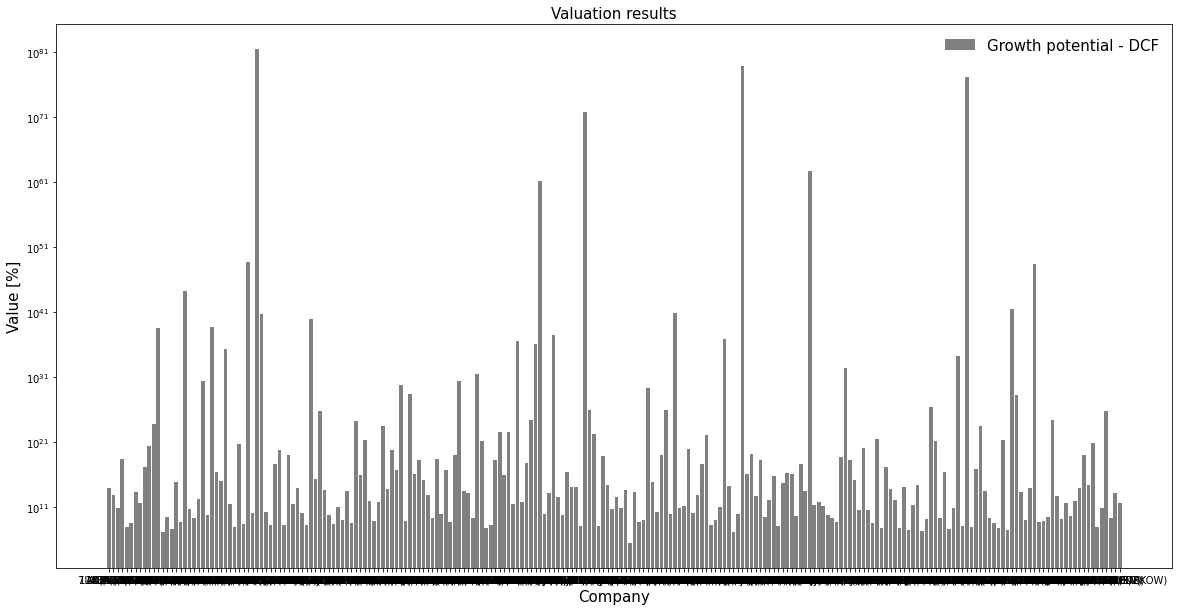

In [35]:
#Chart growth potential reached (logarithmic scale) 
ax=plt.figure(figsize=(20, 10))
plt.bar(df['Company'], df['Growth potential - DCF %'], 
        color = 'gray', label = 'Growth potential - DCF', log=1)
plt.xticks(df['Company'])
plt.legend(frameon=False, fontsize=15)
plt.xlabel('Company', fontsize=15)
plt.ylabel('Value [%]', fontsize=15)
plt.title('Valuation results', fontsize=15);


Text(241.82000000000002, 162.18999999999997, 'Median return: 140.0%')

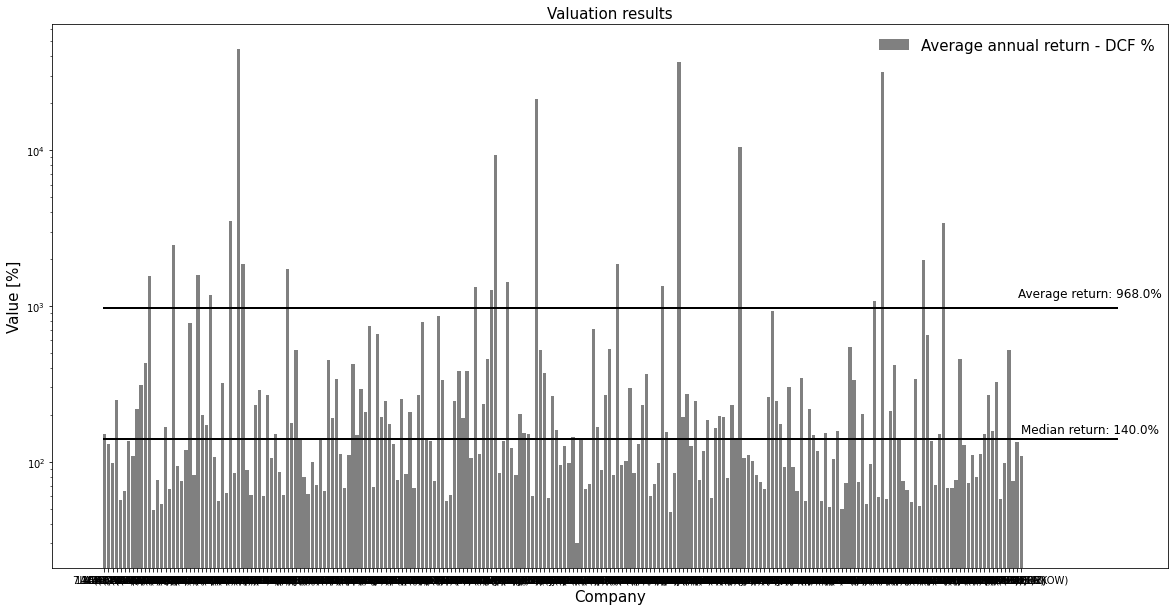

In [36]:
#Chart Average annual return reached (logarithmic scale) 
plt.figure(figsize=(20, 10))
plt.bar(df['Company'], df['Average annual return - DCF %'], 
        color = 'gray', label = 'Average annual return - DCF %', log=1)
plt.xticks(df['Company'])
plt.legend(frameon=False, fontsize=15)
plt.xlabel('Company', fontsize=15)
plt.ylabel('Value [%]', fontsize=15)
plt.title('Valuation results', fontsize=15);

#Drawing the mean line 
av = df['Average annual return - DCF %'].mean()
plt.plot([0, 1.1*len(df)], [av, av], 'k-', lw=2)
txt = ('Average return: {}%'.format(round(av,0)))
plt.text(1.07*len(df), av+len(df), txt, horizontalalignment='center', verticalalignment='center', fontsize=12);

#Drawing the mean line 
med = df['Average annual return - DCF %'].median()
plt.plot([0, 1.1*len(df)], [med, med], 'k-', lw=2)
txt = ('Median return: {}%'.format(round(med,0)))
plt.text(1.07*len(df), med+0.1*len(df), txt, horizontalalignment='center', verticalalignment='center', fontsize=12)

### 1.6 Selection of the best companies based on the discounted cash flow (DCF) method 

In [37]:
#Selecting companies with the greatest potential >100%
df[ df['Average annual return - DCF %'] > 100 ]

,Company,Report,Price,Number of shares [in thous.],Average cash flow [in thous. PLN],Net profit [%],Market,Sector,Industry,Book value per share 5 years (average) [%],Price / Book Value,Price / Profit,ROE [%],Sum of discounted flows DFCF+DPCF,Intrinsic value per share - DCF,Growth potential - DCF %,Average annual return - DCF %
0,11B (11BIT),2020/Q3,519.00,2361,66391,129.93,GPW,GPW: Informatyka,Gry,41.0,7.66,27.84,27.51,1.050460e+15,4.449215e+14,8.572669e+13,149.90
1,7LV (7LEVELS),2020/Q4,30.60,575,1387,101.90,NC,NC: Informatyka,Gry,74.0,7.45,1380.56,0.54,1.243331e+12,2.162314e+12,7.066386e+12,129.95
3,ABK (ABAK),2020/Q4,3.38,2695,1049,240.42,NC,NC: Usługi finansowe,Usługi dla przedsiębiorstw,11.0,2.41,9.90,24.31,1.805104e+17,6.697975e+16,1.981649e+18,249.33
6,AFH (AFHOL),2020/Q4,8.35,9043,1384,124.19,NC,NC: Usługi finansowe,Pośrednictwo finansowe,37.0,3.45,20.44,16.86,1.241124e+13,1.372469e+12,1.643675e+13,136.52
7,AGP (AGROMEP),2020/Q4,4.86,3260,550,82.94,NC,NC: Handel,Zaopatrzenie przedsiębiorstw,-1.0,1.70,20.52,8.27,6.115884e+10,1.876038e+10,3.860161e+11,108.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,WAS (WASKO),2020/Q4,1.56,91188,39864,122.73,GPW,GPW: Informatyka,Informatyka,2.0,0.59,11.98,4.90,3.089161e+14,3.387684e+12,2.171592e+14,157.77
219,WHH (WERTHHOLZ),2021/Q1,0.39,85184,213,381.33,NC,NC: Budownictwo,Wyposażenie domu,0.0,1.55,30.11,5.15,2.428857e+20,2.851306e+18,7.311041e+20,325.40
222,XTB,2020/Q4,17.00,117384,52063,596.85,GPW,GPW: Rynek kapitałowy,Rynek kapitałowy,19.0,2.16,4.77,45.26,1.130803e+27,9.633366e+24,5.666686e+25,519.12
224,ZUE,2020/Q3,5.35,23030,12973,104.49,GPW,GPW: Budownictwo,Budownictwo,-6.0,0.80,45.13,1.78,1.532313e+13,6.653551e+11,1.243654e+13,134.33


In [38]:
#Selection of 10 companies with the greatest potential 
df.sort_values(by = ['Average annual return - DCF %'], ascending=False).head(10)

,Company,Report,Price,Number of shares [in thous.],Average cash flow [in thous. PLN],Net profit [%],Market,Sector,Industry,Book value per share 5 years (average) [%],Price / Book Value,Price / Profit,ROE [%],Sum of discounted flows DFCF+DPCF,Intrinsic value per share - DCF,Growth potential - DCF %,Average annual return - DCF %
33,BMX (BIOMAXIMA),2020/Q4,32.80,4320,3805,55300.00,NC,NC: Ochrona zdrowia,Biotechnologia,4.0,5.27,17.86,29.48,4.371761e+81,1.011982e+81,3.085310e+81,44531.69
141,MRC (MERCATOR),2020/Q3,384.00,10605,366052,43493.34,GPW,GPW: Przemysł farmaceutyczny,Sprzęt i materiały medyczne,52.0,5.94,6.96,85.41,3.205242e+80,3.022388e+79,7.870802e+78,36476.37
191,SNG (SYNERGA),2020/Q3,0.25,273100,70,44048.00,NC,NC: Inwestycje,Działalność inwestycyjna,75.0,1.63,1.61,101.21,8.950875e+76,3.277508e+74,1.311003e+77,31809.51
106,JRH (JRHOLDING),2020/Q3,13.60,39000,2955,27728.95,NC,NC: Inwestycje,Nieruchomości,102.0,0.58,0.61,95.46,3.781568e+72,9.696329e+70,7.129653e+71,21202.75
156,OPM (OPTEAM),2020/Q4,16.50,7872,18553,12216.35,GPW,GPW: Informatyka,Informatyka,39.0,0.86,0.55,155.46,6.287773e+62,7.987517e+61,4.840919e+62,10439.77
96,INL (INTROL),2020/Q3,4.96,25704,26467,10735.50,GPW,GPW: Przemysł elektromaszynowy,Przemysł elektromaszynowy,-1.0,0.94,6.89,13.64,1.969758e+61,7.663236e+59,1.545007e+61,9296.46
31,BLR (BLIRT),2020/Q4,20.20,17197,17775,4222.37,NC,NC: Ochrona zdrowia,Biotechnologia,31.0,11.72,15.68,74.72,1.905070e+49,1.107792e+48,5.484118e+48,3513.85
206,TMP (TELEMEDPL),2020/Q4,1.53,8682,1918,3962.50,NC,NC: Ochrona zdrowia,Szpitale i przychodnie,12.0,3.81,34.13,11.15,3.304223e+47,3.805832e+46,2.487472e+48,3419.86
17,ASR (ASTRO),2020/Q4,0.46,37111,90,3178.57,NC,NC: Media,Media,-12.0,1.82,38.06,4.79,2.835355e+43,7.640202e+41,1.660913e+44,2454.73
201,SUW (SUWARY),2020/Q1,27.80,4615,5645,2346.77,GPW,GPW: Przemysł tworzyw sztucznych,Guma i tworzywa sztuczne,9.0,1.43,6.46,22.14,3.421730e+41,7.414366e+40,2.667038e+41,1961.58


In [39]:
#Cumulative average annual profit depending on the market 
df\
    .groupby("Market") \
    .agg(total_average_annual_return = ('Average annual return - DCF %','sum')) \
    .sort_values(by="total_average_annual_return",ascending=False).head(10)

,total_average_annual_return
Market,
NC,133536.56
GPW,85293.48


In [40]:
#Cumulative average annual return depending on the market, sector and industry 
df\
    .groupby(['Market', 'Sector', 'Industry']) \
    .agg(total_average_annual_return = ('Average annual return - DCF %', 'sum')) \
    .sort_values(by = "total_average_annual_return", ascending=False).head(20)

total_average_annual_return
Market Sector                           Industry                                                 
NC     NC: Ochrona zdrowia              Biotechnologia                                   48045.54
GPW    GPW: Przemysł farmaceutyczny     Sprzęt i materiały medyczne                      36476.37
NC     NC: Inwestycje                   Działalność inwestycyjna                         33828.40
                                        Nieruchomości                                    21202.75
GPW    GPW: Informatyka                 Informatyka                                      14829.30
       GPW: Przemysł elektromaszynowy   Przemysł elektromaszynowy                         9824.40
NC     NC: Media                        Media                                             4608.54
       NC: Informatyka                  Informatyka                                       4335.31
       NC: Ochrona zdrowia              Szpitale i przychodnie                            3419.86
GPW    GPW: Finanse inne                Działalność inwestycyjna                          2751.54
       GPW: Przemysł tworzyw sztucznych Guma i tworzywa sztuczne                          2357.90
       GPW: Handel hurtowy              Zaopatrzenie przedsiębiorstw                      2109.59
       GPW: Rynek kapitałowy            Rynek kapitałowy                                  2039.27
NC     NC: Budownictwo                  Budownictwo                                       1916.18
       NC: Handel                       Zaopatrzenie przedsiębiorstw                      1838.87
GPW    GPW: Przemysł chemiczny          Chemia                                            1808.48
       GPW: Budownictwo                 Budownictwo                                       1608.42
       GPW: Przemysł spożywczy          Artykuły spożywcze                                1526.82
NC     NC: Usługi inne                  Media                                             1392.64
GPW    GPW: Deweloperzy                 Nieruchomości                                     1300.12

In [41]:
#Average annual average return depending on the market, sector and industry 
df\
    .groupby(['Market', 'Sector', 'Industry'])\
    .agg(average_annual_return = ('Average annual return - DCF %', 'mean'))\
    .sort_values(by = "average_annual_return", ascending=False).head(20)

average_annual_return
Market Sector                           Industry                                           
GPW    GPW: Przemysł farmaceutyczny     Sprzęt i materiały medyczne            36476.370000
NC     NC: Ochrona zdrowia              Biotechnologia                         24022.770000
       NC: Inwestycje                   Nieruchomości                          21202.750000
                                        Działalność inwestycyjna                8457.100000
       NC: Ochrona zdrowia              Szpitale i przychodnie                  3419.860000
GPW    GPW: Przemysł elektromaszynowy   Przemysł elektromaszynowy               1228.050000
NC     NC: Wypoczynek                   Rekreacja i wypoczynek                  1082.450000
GPW    GPW: Informatyka                 Informatyka                              988.620000
NC     NC: Media                        Media                                    921.708000
GPW    GPW: Przemysł chemiczny          Chemia                                   904.240000
       GPW: Przemysł farmaceutyczny     Odzież i kosmetyki                       862.470000
       GPW: Rynek kapitałowy            Rynek kapitałowy                         679.756667
       GPW: Przemysł tworzyw sztucznych Guma i tworzywa sztuczne                 589.475000
       GPW: Finanse inne                Działalność inwestycyjna                 550.308000
NC     NC: Usługi inne                  Media                                    464.213333
GPW    GPW: Handel hurtowy              Zaopatrzenie przedsiębiorstw             421.918000
NC     NC: Technologie                  Informatyka                              366.410000
       NC: Informatyka                  Informatyka                              361.275833
       NC: Technologie                  Nowe technologie                         351.785000
       NC: Recykling                    Budownictwo                              343.480000

## 2.  Book Value Method (BVM) based on the increase of book value  (according to Warren Buffett)

The method used to determine the intrinsic value of the company based on the book value. First, the average increase in book value for the selected period is determined. Then the book value is calculated for a given period in the future. Additionally, the value of the dividend paid (if it is) is added to the book value. The final intrinsic value is the book value for x years discounted with the cost of capital, which in this case is the yield on 10-year government bonds. In addition, an assumed value is added to the discount (it is a margin of valuation error).


Book value per share = Equity / Number of shares, and indicates the value of the company's assets and informs shareholders of the book value per share.


### 2.1 Parameters of the companies

In [42]:
#Set the Company column as an index 
df.set_index('Company', inplace=True)

In [43]:
#Selection of companies only with an increase in book value and a positive value of Price / Book Value 
df = df[ (df['Book value per share 5 years (average) [%]'] > 0) & (df['Price / Book Value'] > 0) ]
df.sample(5)

,Report,Price,Number of shares [in thous.],Average cash flow [in thous. PLN],Net profit [%],Market,Sector,Industry,Book value per share 5 years (average) [%],Price / Book Value,Price / Profit,ROE [%],Sum of discounted flows DFCF+DPCF,Intrinsic value per share - DCF,Growth potential - DCF %,Average annual return - DCF %
Company,,,,,,,,,,,,,,,,
EON (EONET),2020/Q4,11.50,2059,4635,93.05,NC,NC: Informatyka,Informatyka,16.0,0.97,7.68,12.64,1.591950e+12,7.731667e+11,6.723189e+12,129.57
ICA (INCANA),2020/Q4,1.98,10977,2285,398.37,NC,NC: Budownictwo,Budownictwo,9.0,2.40,14.21,16.91,6.463593e+21,5.888306e+20,2.973892e+22,381.33
SON (SONEL),2020/Q3,9.65,14000,9467,33.59,GPW,GPW: Przemysł elektromaszynowy,Przemysł elektromaszynowy,5.0,1.53,9.98,15.28,2.950964e+09,2.107831e+08,2.184281e+09,75.65
ALL (AILLERON),2020/Q4,14.60,12356,19348,1789.98,GPW,GPW: Informatyka,Informatyka,7.0,1.94,19.52,9.92,6.556654e+38,5.306454e+37,3.634557e+38,1554.56
ERG,2020/Q3,46.80,876,4177,245.63,GPW,GPW: Przemysł tworzyw sztucznych,Guma i tworzywa sztuczne,4.0,1.08,15.09,7.15,1.046319e+18,1.194428e+18,2.552197e+18,252.29


- The current market price 

In [44]:
df['Price']

Company
11B (11BIT)        519.00
7LV (7LEVELS)       30.60
ABE (ABPL)          47.90
ABK (ABAK)           3.38
ACP (ASSECOPOL)     67.40
                    ...  
VGO (VIGOSYS)      735.00
WAS (WASKO)          1.56
WTN (WITTCHEN)       9.18
XPL (XPLUS)          3.42
XTB                 17.00
Name: Price, Length: 157, dtype: float64

- Average book value increase 

In [45]:
df['Book value per share 5 years (average) [%]']

Company
11B (11BIT)        41.0
7LV (7LEVELS)      74.0
ABE (ABPL)         11.0
ABK (ABAK)         11.0
ACP (ASSECOPOL)     2.0
                   ... 
VGO (VIGOSYS)      27.0
WAS (WASKO)         2.0
WTN (WITTCHEN)     16.0
XPL (XPLUS)        20.0
XTB                19.0
Name: Book value per share 5 years (average) [%], Length: 157, dtype: float64

- Current Book Value

In [46]:
df['Price / Book Value']

Company
11B (11BIT)         7.66
7LV (7LEVELS)       7.45
ABE (ABPL)          0.82
ABK (ABAK)          2.41
ACP (ASSECOPOL)     0.96
                   ...  
VGO (VIGOSYS)       5.40
WAS (WASKO)         0.59
WTN (WITTCHEN)      1.11
XPL (XPLUS)        12.83
XTB                 2.16
Name: Price / Book Value, Length: 157, dtype: float64

In [47]:
df['Book Value'] = round(df['Price'] / df['Price / Book Value'], 2)
df.head(5)

,Report,Price,Number of shares [in thous.],Average cash flow [in thous. PLN],Net profit [%],Market,Sector,Industry,Book value per share 5 years (average) [%],Price / Book Value,Price / Profit,ROE [%],Sum of discounted flows DFCF+DPCF,Intrinsic value per share - DCF,Growth potential - DCF %,Average annual return - DCF %,Book Value
Company,,,,,,,,,,,,,,,,,
11B (11BIT),2020/Q3,519.00,2361,66391,129.93,GPW,GPW: Informatyka,Gry,41.0,7.66,27.84,27.51,1.050460e+15,4.449215e+14,8.572669e+13,149.90,67.75
7LV (7LEVELS),2020/Q4,30.60,575,1387,101.90,NC,NC: Informatyka,Gry,74.0,7.45,1380.56,0.54,1.243331e+12,2.162314e+12,7.066386e+12,129.95,4.11
ABE (ABPL),2020/Q2,47.90,16188,47754,64.00,GPW,GPW: Handel hurtowy,Handel hurtowy,11.0,0.82,7.67,10.74,5.882474e+11,3.633848e+10,7.586322e+10,97.70,58.41
ABK (ABAK),2020/Q4,3.38,2695,1049,240.42,NC,NC: Usługi finansowe,Usługi dla przedsiębiorstw,11.0,2.41,9.90,24.31,1.805104e+17,6.697975e+16,1.981649e+18,249.33,1.40
ACP (ASSECOPOL),2020/Q3,67.40,83000,536400,14.24,GPW,GPW: Informatyka,Informatyka,2.0,0.96,15.99,6.02,1.863455e+10,2.245126e+08,3.331047e+08,64.98,70.21


### 2.2 Valuation parameters 

- Number of years (base investment period) `y`

In [48]:
y = 10

- Discounting rate (interest rate on 10-year government bonds)  `d`

In [49]:
d = 1.56

- Additional discounting (approximate value, as an additional margin of valuation error) `da`

In [50]:
da = 3

### 2.3 Calculation of the book value in the basic period 

In [53]:
def exp_book_value(data):
    bvf = (data['Book Value'] * ( data['Book value per share 5 years (average) [%]'] / 100 +1) ** y)
    return round(bvf,2);
     
df['Expected book value'] = df.apply(exp_book_value, axis=1)    
df.head(5)

,Report,Price,Number of shares [in thous.],Average cash flow [in thous. PLN],Net profit [%],Market,Sector,Industry,Book value per share 5 years (average) [%],Price / Book Value,Price / Profit,ROE [%],Sum of discounted flows DFCF+DPCF,Intrinsic value per share - DCF,Growth potential - DCF %,Average annual return - DCF %,Book Value,Expected book value,Expected book value
Company,,,,,,,,,,,,,,,,,,,
11B (11BIT),2020/Q3,519.00,2361,66391,129.93,GPW,GPW: Informatyka,Gry,41.0,7.66,27.84,27.51,1.050460e+15,4.449215e+14,8.572669e+13,149.90,67.75,2104.26,2104.26
7LV (7LEVELS),2020/Q4,30.60,575,1387,101.90,NC,NC: Informatyka,Gry,74.0,7.45,1380.56,0.54,1.243331e+12,2.162314e+12,7.066386e+12,129.95,4.11,1045.52,1045.52
ABE (ABPL),2020/Q2,47.90,16188,47754,64.00,GPW,GPW: Handel hurtowy,Handel hurtowy,11.0,0.82,7.67,10.74,5.882474e+11,3.633848e+10,7.586322e+10,97.70,58.41,165.85,165.85
ABK (ABAK),2020/Q4,3.38,2695,1049,240.42,NC,NC: Usługi finansowe,Usługi dla przedsiębiorstw,11.0,2.41,9.90,24.31,1.805104e+17,6.697975e+16,1.981649e+18,249.33,1.40,3.98,3.98
ACP (ASSECOPOL),2020/Q3,67.40,83000,536400,14.24,GPW,GPW: Informatyka,Informatyka,2.0,0.96,15.99,6.02,1.863455e+10,2.245126e+08,3.331047e+08,64.98,70.21,85.59,85.59


### 2.4 Company valuation by BVM

- Intrinsic value per share over the entire investment period

In [54]:
def value(data):
    iv = data['Expected book value'] / (1 + y * ((d + da) / 100))
    return round(iv,2);
      
df['Intrinsic value per share - BVM']=df.apply(value, axis=1);    


- Growth potential BVM

In [56]:
def growth(data):
    r = (data['Intrinsic value per share - BVM'] - data['Price']) / data['Price'] * 100
    return round(r, 2);
         
df['Growth potential - BVM %'] = df.apply(growth, axis=1);    


- Average annual return 

In [57]:
def ave_annual_return(data):
    ar = ((1 + data['Growth potential - DCF %'] / 100) ** (1 / (y + ya)) - 1) * 100
    return round(ar, 2);
         
df['Average annual return - DCF %'] = df.apply(ave_annual_return, axis=1);    
df.head(5)

,Report,Price,Number of shares [in thous.],Average cash flow [in thous. PLN],Net profit [%],Market,Sector,Industry,Book value per share 5 years (average) [%],Price / Book Value,...,ROE [%],Sum of discounted flows DFCF+DPCF,Intrinsic value per share - DCF,Growth potential - DCF %,Average annual return - DCF %,Book Value,Expected book value,Expected book value,Intrinsic value per share - BVM,Growth potential - BVM %
Company,,,,,,,,,,,,,,,,,,,,,
11B (11BIT),2020/Q3,519.00,2361,66391,129.93,GPW,GPW: Informatyka,Gry,41.0,7.66,...,27.51,1.050460e+15,4.449215e+14,8.572669e+13,149.90,67.75,2104.26,2104.26,1445.23,178.46
7LV (7LEVELS),2020/Q4,30.60,575,1387,101.90,NC,NC: Informatyka,Gry,74.0,7.45,...,0.54,1.243331e+12,2.162314e+12,7.066386e+12,129.95,4.11,1045.52,1045.52,718.08,2246.67
ABE (ABPL),2020/Q2,47.90,16188,47754,64.00,GPW,GPW: Handel hurtowy,Handel hurtowy,11.0,0.82,...,10.74,5.882474e+11,3.633848e+10,7.586322e+10,97.70,58.41,165.85,165.85,113.91,137.81
ABK (ABAK),2020/Q4,3.38,2695,1049,240.42,NC,NC: Usługi finansowe,Usługi dla przedsiębiorstw,11.0,2.41,...,24.31,1.805104e+17,6.697975e+16,1.981649e+18,249.33,1.40,3.98,3.98,2.73,-19.23
ACP (ASSECOPOL),2020/Q3,67.40,83000,536400,14.24,GPW,GPW: Informatyka,Informatyka,2.0,0.96,...,6.02,1.863455e+10,2.245126e+08,3.331047e+08,64.98,70.21,85.59,85.59,58.78,-12.79


### 2.5 Podsumowanie wyników metody opartej o wzrost wartości księgowej (wg Warrena Buffeta)

In [53]:
df[['Aktualny kurs','Wartość wewnętrzna na 1 akcje wg BVM',
    'Potencjał wzrostu wg BVM %','Średnioroczny zwrot wg BVM %']]

,Aktualny kurs,Wartość wewnętrzna na 1 akcje wg BVM,Potencjał wzrostu wg BVM %,Średnioroczny zwrot wg BVM %
Spółka,,,,
11B (11BIT),519.00,1445.23,178.46,3.47
7LV (7LEVELS),30.60,718.08,2246.67,11.09
ABE (ABPL),47.90,113.91,137.81,2.93
ABK (ABAK),3.38,2.73,-19.23,-0.71
ACP (ASSECOPOL),67.40,58.78,-12.79,-0.46
...,...,...,...,...
VGO (VIGOSYS),735.00,1020.39,38.83,1.10
WAS (WASKO),1.56,2.21,41.67,1.17
WTN (WITTCHEN),9.18,25.05,172.88,3.40


In [54]:
df[['Aktualny kurs','Wartość wewnętrzna na 1 akcje wg BVM',
    'Potencjał wzrostu wg BVM %','Średnioroczny zwrot wg BVM %']].describe()

,Aktualny kurs,Wartość wewnętrzna na 1 akcje wg BVM,Potencjał wzrostu wg BVM %,Średnioroczny zwrot wg BVM %
count,157.000000,157.000000,157.000000,157.000000
mean,45.306051,207.978280,1526.766688,1.428726
std,107.369511,1476.157213,11146.020635,5.394303
min,0.190000,0.080000,-97.110000,-11.140000
25%,3.900000,4.380000,-30.040000,-1.180000
50%,11.900000,17.870000,38.600000,1.090000
75%,27.800000,51.440000,143.080000,3.010000
max,735.000000,18217.770000,133854.190000,27.130000


In [55]:
#Zmiana indeksu przed rysowaniem wykresu
df.reset_index(inplace=True)

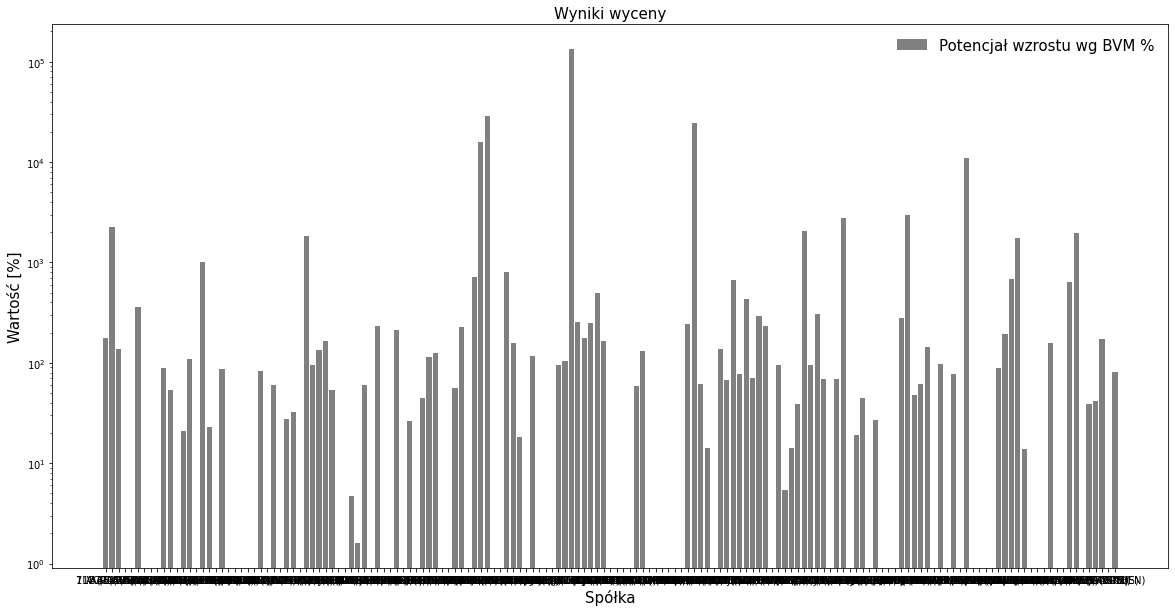

In [56]:
#Wykres osiągniętego potencjału wzrostu % (wykres zlogarytmowany)
ax = plt.figure(figsize=(20, 10))
plt.bar(df['Spółka'], df['Potencjał wzrostu wg BVM %'], 
        color = 'gray', label = 'Potencjał wzrostu wg BVM %', log=1)
plt.xticks(df['Spółka'])
plt.legend(frameon=False, fontsize=15)
plt.xlabel('Spółka', fontsize=15)
plt.ylabel('Wartość [%]', fontsize=15)
plt.title('Wyniki wyceny', fontsize=15);


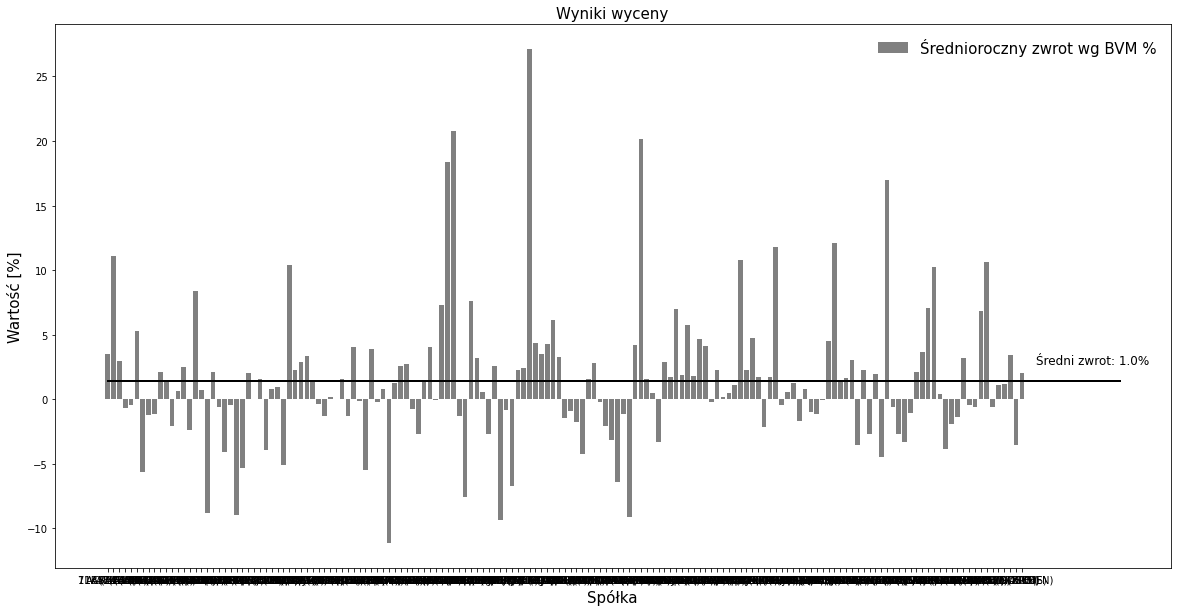

In [57]:
#Wykres osiągniętych średniorocznych zwrotów
plt.figure(figsize=(20, 10))
plt.bar(df['Spółka'], df['Średnioroczny zwrot wg BVM %'], 
        color = 'gray', label = 'Średnioroczny zwrot wg BVM %')
plt.xticks(df['Spółka'])
plt.legend(frameon=False, fontsize=15)
plt.xlabel('Spółka', fontsize=15)
plt.ylabel('Wartość [%]', fontsize=15)
plt.title('Wyniki wyceny', fontsize=15);

#Narysowanie lini średniej
av=df['Średnioroczny zwrot wg BVM %'].mean()
plt.plot([0, 1.1*len(df)], [av, av], 'k-', lw=2)

txt=('Średni zwrot: {}%'.format(round(av, 0)))
plt.text(1.07*len(df), av+0.01*len(df), txt, horizontalalignment='center', 
         verticalalignment='center', fontsize=12);

### 2.6 Wybór najlepszych spółek na podstawie metody opartej o wzrost wartości księgowej (wg Warrena Buffeta)

In [58]:
#Wybranie tylko spółek o największym potencjale >1%
df[ df['Średnioroczny zwrot wg BVM %'] > 1 ]

,Spółka,Raport,Aktualny kurs,Liczba akcji [tys.],Średnie przepływy pieniężne [w tys. PLN],Zysk netto [%],Rynek,Sektor,Branża,Wartość księgowa na akcję 5 lat (średnio) [%],...,ROE [%],Suma zdyskontowanych przepływów DFCF+DPCF,Wartość wewnętrzna na 1 akcje wg DCF,Potencjał wzrostu wg DCF %,Średnioroczny zwrot wg DCF %,Wartość księgowa,Wartość księgowa oczekiwana,Wartość wewnętrzna na 1 akcje wg BVM,Potencjał wzrostu wg BVM %,Średnioroczny zwrot wg BVM %
0,11B (11BIT),2020/Q3,519.00,2361,66391,129.93,GPW,GPW: Informatyka,Gry,41.0,...,27.51,1.050460e+15,4.449215e+14,8.572669e+13,149.90,67.75,2104.26,1445.23,178.46,3.47
1,7LV (7LEVELS),2020/Q4,30.60,575,1387,101.90,NC,NC: Informatyka,Gry,74.0,...,0.54,1.243331e+12,2.162314e+12,7.066386e+12,129.95,4.11,1045.52,718.08,2246.67,11.09
2,ABE (ABPL),2020/Q2,47.90,16188,47754,64.00,GPW,GPW: Handel hurtowy,Handel hurtowy,11.0,...,10.74,5.882474e+11,3.633848e+10,7.586322e+10,97.70,58.41,165.85,113.91,137.81,2.93
5,AFH (AFHOL),2020/Q4,8.35,9043,1384,124.19,NC,NC: Usługi finansowe,Pośrednictwo finansowe,37.0,...,16.86,1.241124e+13,1.372469e+12,1.643675e+13,136.52,2.42,56.37,38.72,363.71,5.25
9,AMC (AMICA),2020/Q3,145.00,7775,149231,29.16,GPW,GPW: Przemysł elektromaszynowy,Wyposażenie domu,12.0,...,13.96,2.745891e+10,3.531693e+09,2.435650e+09,76.29,128.32,398.54,273.72,88.77,2.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,VEE,2020/Q4,29.80,1330,226,100.75,NC,NC: Informatyka,Telekomunikacja,45.0,...,0.30,1.791095e+11,1.346688e+11,4.519087e+11,109.81,21.75,893.59,613.73,1959.50,10.61
152,VGO (VIGOSYS),2020/Q4,735.00,729,150,134.42,GPW,GPW: Przemysł elektromaszynowy,Nowe technologie,27.0,...,32.36,3.674997e+12,5.041148e+12,6.858704e+11,112.75,136.11,1485.69,1020.39,38.83,1.10
153,WAS (WASKO),2020/Q4,1.56,91188,39864,122.73,GPW,GPW: Informatyka,Informatyka,2.0,...,4.90,3.089161e+14,3.387684e+12,2.171592e+14,157.77,2.64,3.22,2.21,41.67,1.17
154,WTN (WITTCHEN),2020/Q3,9.18,18223,10700,3.69,GPW,GPW: Handel detaliczny,Odzież i kosmetyki,16.0,...,15.19,1.365946e+08,7.495723e+06,8.165266e+07,57.42,8.27,36.48,25.05,172.88,3.40


In [59]:
#Wybranie 10 spółek o największym potencjale
df.sort_values(by = ['Średnioroczny zwrot wg BVM %'], ascending=False).head(10)

,Spółka,Raport,Aktualny kurs,Liczba akcji [tys.],Średnie przepływy pieniężne [w tys. PLN],Zysk netto [%],Rynek,Sektor,Branża,Wartość księgowa na akcję 5 lat (średnio) [%],...,ROE [%],Suma zdyskontowanych przepływów DFCF+DPCF,Wartość wewnętrzna na 1 akcje wg DCF,Potencjał wzrostu wg DCF %,Średnioroczny zwrot wg DCF %,Wartość księgowa,Wartość księgowa oczekiwana,Wartość wewnętrzna na 1 akcje wg BVM,Potencjał wzrostu wg BVM %,Średnioroczny zwrot wg BVM %
72,JRH (JRHOLDING),2020/Q3,13.60,39000,2955,27728.95,NC,NC: Inwestycje,Nieruchomości,102.0,...,95.46,3.781568e+72,9.696329e+70,7.129653e+71,21202.75,23.45,26525.07,18217.77,133854.19,27.13
59,HRT (HURTIMEX),2020/Q4,0.29,21769,1014,166.15,NC,NC: Handel,Odzież i kosmetyki,108.0,...,7.53,4.644703e+14,2.133632e+13,7.357351e+15,189.88,0.08,121.26,83.28,28617.24,20.76
91,MGA (MEGASONIC),2018/Q3,0.55,2415,10,431.51,NC,NC: Technologie,Informatyka,43.0,...,31.48,1.535813e+20,6.359475e+19,1.156268e+22,366.41,5.50,196.66,135.07,24458.18,20.14
58,HRL (HORNIGOLD),2020/Q4,0.20,168666,7980,383.93,NC,NC: Usługi inne,Media,83.0,...,22.03,1.047144e+22,6.208391e+19,3.104195e+22,382.02,0.11,46.33,31.82,15810.00,18.41
133,SNG (SYNERGA),2020/Q3,0.25,273100,70,44048.00,NC,NC: Inwestycje,Działalność inwestycyjna,75.0,...,101.21,8.950875e+76,3.277508e+74,1.311003e+77,31809.51,0.15,40.41,27.75,11000.00,17.00
124,RMK (REMAK),2020/Q4,21.50,3000,40981,52.40,GPW,GPW: Przemysł elektromaszynowy,Budownictwo,49.0,...,29.69,1.252047e+11,4.173490e+10,1.941158e+11,103.99,17.92,966.50,663.80,2987.44,12.11
114,PIT (POLARISIT),2020/Q3,1.76,58120,2488,1115.38,NC,NC: Usługi inne,Media,55.0,...,0.98,2.761225e+32,4.750904e+30,2.699377e+32,933.65,0.91,72.84,50.03,2742.61,11.80
1,7LV (7LEVELS),2020/Q4,30.60,575,1387,101.90,NC,NC: Informatyka,Gry,74.0,...,0.54,1.243331e+12,2.162314e+12,7.066386e+12,129.95,4.11,1045.52,718.08,2246.67,11.09
108,OPM (OPTEAM),2020/Q4,16.50,7872,18553,12216.35,GPW,GPW: Informatyka,Informatyka,39.0,...,155.46,6.287773e+62,7.987517e+61,4.840919e+62,10439.77,19.19,516.68,354.86,2050.67,10.77
150,VEE,2020/Q4,29.80,1330,226,100.75,NC,NC: Informatyka,Telekomunikacja,45.0,...,0.30,1.791095e+11,1.346688e+11,4.519087e+11,109.81,21.75,893.59,613.73,1959.50,10.61


In [60]:
#Skumulowany średnioroczny zwrot w zależności od rynku
df\
    .groupby("Rynek")\
    .agg(sum_zwrot = ('Średnioroczny zwrot wg BVM %', 'sum'))\
    .sort_values(by = "sum_zwrot", ascending=False).head(10)

,sum_zwrot
Rynek,
NC,158.74
GPW,65.57


In [61]:
#Skumulowany średnioroczny zwrot w zależności od rynku, sektora, branży
df\
    .groupby(['Rynek', 'Sektor','Branża'])\
    .agg(suma_zwrot = ('Średnioroczny zwrot wg BVM %', 'sum'))\
    .sort_values(by = "suma_zwrot", ascending=False).head(10)

suma_zwrot
Rynek Sektor                         Branża                              
NC    NC: Usługi inne                Media                          35.94
      NC: Inwestycje                 Nieruchomości                  27.13
      NC: Handel                     Odzież i kosmetyki             20.76
      NC: Technologie                Informatyka                    20.14
      NC: Inwestycje                 Działalność inwestycyjna       13.47
GPW   GPW: Deweloperzy               Nieruchomości                  12.93
      GPW: Przemysł spożywczy        Artykuły spożywcze             12.21
      GPW: Przemysł elektromaszynowy Budownictwo                    12.11
NC    NC: Informatyka                Telekomunikacja                10.61
      NC: Usługi finansowe           Wierzytelności                 10.37

In [62]:
#Średni średnioroczny zwrot w zależności od rynku, sektora, branży
df\
    .groupby(['Rynek', 'Sektor', 'Branża'])\
    .agg(średni_zwrot = ('Średnioroczny zwrot wg BVM %', 'mean'))\
    .sort_values(by="średni_zwrot", ascending=False).head(10)

średni_zwrot
Rynek Sektor                         Branża                                   
NC    NC: Inwestycje                 Nieruchomości                       27.13
      NC: Handel                     Odzież i kosmetyki                  20.76
      NC: Technologie                Informatyka                         20.14
GPW   GPW: Przemysł elektromaszynowy Budownictwo                         12.11
NC    NC: Usługi inne                Media                               11.98
      NC: Informatyka                Telekomunikacja                     10.61
      NC: Usługi finansowe           Wierzytelności                      10.37
      NC: Usługi inne                Usługi dla przedsiębiorstw           7.07
GPW   GPW: Przemysł farmaceutyczny   Sprzęt i materiały medyczne          7.00
NC    NC: Eco-energia                Motoryzacja                          4.77

## 3. Metoda oparta o ROE

Metoda polega na obliczeniu wartości wewnętrznej spółki na podstawie zysku i wskaźnika rentowności kapitału własnego ROE. Wyznacza się wartość wewnętrzną spółki jako iloczyn zysku na akcje i wskaźnika rentowności kapitału i porównuje z obecną ceną akcji.

Wskaźnik rentowności kapitału własnego (ang. return on equity, ROE, stopa zwrotu z kapitału własnego lub rentowność kapitału własnego) jest to wskaźnik określający jak wiele zysku udało się wygospodarować spółce z wniesionych kapitałów własnych. Wskaźnik ROE stanowi zysk za dany okres do stanu kapitałów własnych na początek danego okresu.

### 3.1 Parametry badanych spółek

In [63]:
#Ustawienie kolumny Spółka jako indeksu
df.set_index('Spółka', inplace=True)

In [64]:
#Wybór spółek tylko z dodanimi przepływami i wzrostem zysku
df = df[ (df['Średnie przepływy pieniężne [w tys. PLN]'] > 0) & (df['Zysk netto [%]'] > 0) ]
df.sample(5)

,Raport,Aktualny kurs,Liczba akcji [tys.],Średnie przepływy pieniężne [w tys. PLN],Zysk netto [%],Rynek,Sektor,Branża,Wartość księgowa na akcję 5 lat (średnio) [%],Cena / Wartość księgowa,...,ROE [%],Suma zdyskontowanych przepływów DFCF+DPCF,Wartość wewnętrzna na 1 akcje wg DCF,Potencjał wzrostu wg DCF %,Średnioroczny zwrot wg DCF %,Wartość księgowa,Wartość księgowa oczekiwana,Wartość wewnętrzna na 1 akcje wg BVM,Potencjał wzrostu wg BVM %,Średnioroczny zwrot wg BVM %
Spółka,,,,,,,,,,,,,,,,,,,,,
STF (STALPROFI),2020/Q3,9.80,17500,58609,1.78,GPW,GPW: Handel hurtowy,Zaopatrzenie przedsiębiorstw,4.0,0.54,...,6.25,6.374763e+08,3.642721e+07,3.717062e+08,65.58,18.15,26.87,18.45,88.27,2.13
GRM (GREMPCO),2020/Q4,0.56,24612,562,4.97,NC,NC: Inwestycje,Działalność inwestycyjna,4.0,0.31,...,4.11,8.017695e+06,3.257637e+05,5.817198e+07,55.65,1.81,2.68,1.84,228.57,4.04
ABK (ABAK),2020/Q4,3.38,2695,1049,240.42,NC,NC: Usługi finansowe,Usługi dla przedsiębiorstw,11.0,2.41,...,24.31,1.805104e+17,6.697975e+16,1.981649e+18,249.33,1.40,3.98,2.73,-19.23,-0.71
ATL (ATLASEST),2020/Q3,2.32,50322,104690,798.08,GPW,GPW: Deweloperzy,Nieruchomości,13.0,0.21,...,20.33,2.410589e+30,4.790328e+28,2.064797e+30,778.68,11.05,37.51,25.76,1010.34,8.35
IZS (IZOSTAL),2020/Q3,3.44,32744,6057,10.72,GPW,GPW: Przemysł metalowy,Przemysł elektromaszynowy,5.0,0.55,...,7.14,1.475990e+08,4.507666e+06,1.310367e+08,59.92,6.25,10.18,6.99,103.20,2.39


- Aktualna cena rynkowa

In [65]:
df['Aktualny kurs']

Spółka
11B (11BIT)        519.00
7LV (7LEVELS)       30.60
ABE (ABPL)          47.90
ABK (ABAK)           3.38
ACP (ASSECOPOL)     67.40
                    ...  
VGO (VIGOSYS)      735.00
WAS (WASKO)          1.56
WTN (WITTCHEN)       9.18
XPL (XPLUS)          3.42
XTB                 17.00
Name: Aktualny kurs, Length: 157, dtype: float64

- Zysk na akcje

In [66]:
df['Zysk na akcje'] = round(df['Aktualny kurs'] / df['Cena / Zysk'], 2)
df['Zysk na akcje']

Spółka
11B (11BIT)        18.64
7LV (7LEVELS)       0.02
ABE (ABPL)          6.25
ABK (ABAK)          0.34
ACP (ASSECOPOL)     4.22
                   ...  
VGO (VIGOSYS)      44.04
WAS (WASKO)         0.13
WTN (WITTCHEN)      1.26
XPL (XPLUS)         0.13
XTB                 3.56
Name: Zysk na akcje, Length: 157, dtype: float64

- Rentowność kapitału własnego ROE 

In [67]:
df['ROE [%]']

Spółka
11B (11BIT)        27.51
7LV (7LEVELS)       0.54
ABE (ABPL)         10.74
ABK (ABAK)         24.31
ACP (ASSECOPOL)     6.02
                   ...  
VGO (VIGOSYS)      32.36
WAS (WASKO)         4.90
WTN (WITTCHEN)     15.19
XPL (XPLUS)        50.18
XTB                45.26
Name: ROE [%], Length: 157, dtype: float64

### 3.2 Wycena spółek

- Wartość wewnętrzna na 1 akcje w całym okresie

In [68]:
def wartosc(dane):
    iv = dane['Zysk na akcje'] * dane['ROE [%]']
    return round(iv, 2);
         
df['Wartość wewnętrzna na 1 akcje ROE'] = df.apply(wartosc, axis=1)    


- Potencjał wzrostu wg ROE

In [69]:
def wzrost(dane):
    r = (dane['Wartość wewnętrzna na 1 akcje ROE'] - dane['Aktualny kurs']) / dane['Aktualny kurs'] * 100
    return round(r, 2);
     
df['Potencjał wzrostu wg ROE %'] = df.apply(wzrost, axis=1)    
df.head(5)

,Raport,Aktualny kurs,Liczba akcji [tys.],Średnie przepływy pieniężne [w tys. PLN],Zysk netto [%],Rynek,Sektor,Branża,Wartość księgowa na akcję 5 lat (średnio) [%],Cena / Wartość księgowa,...,Potencjał wzrostu wg DCF %,Średnioroczny zwrot wg DCF %,Wartość księgowa,Wartość księgowa oczekiwana,Wartość wewnętrzna na 1 akcje wg BVM,Potencjał wzrostu wg BVM %,Średnioroczny zwrot wg BVM %,Zysk na akcje,Wartość wewnętrzna na 1 akcje ROE,Potencjał wzrostu wg ROE %
Spółka,,,,,,,,,,,,,,,,,,,,,
11B (11BIT),2020/Q3,519.00,2361,66391,129.93,GPW,GPW: Informatyka,Gry,41.0,7.66,...,8.572669e+13,149.90,67.75,2104.26,1445.23,178.46,3.47,18.64,512.79,-1.20
7LV (7LEVELS),2020/Q4,30.60,575,1387,101.90,NC,NC: Informatyka,Gry,74.0,7.45,...,7.066386e+12,129.95,4.11,1045.52,718.08,2246.67,11.09,0.02,0.01,-99.97
ABE (ABPL),2020/Q2,47.90,16188,47754,64.00,GPW,GPW: Handel hurtowy,Handel hurtowy,11.0,0.82,...,7.586322e+10,97.70,58.41,165.85,113.91,137.81,2.93,6.25,67.12,40.13
ABK (ABAK),2020/Q4,3.38,2695,1049,240.42,NC,NC: Usługi finansowe,Usługi dla przedsiębiorstw,11.0,2.41,...,1.981649e+18,249.33,1.40,3.98,2.73,-19.23,-0.71,0.34,8.27,144.67
ACP (ASSECOPOL),2020/Q3,67.40,83000,536400,14.24,GPW,GPW: Informatyka,Informatyka,2.0,0.96,...,3.331047e+08,64.98,70.21,85.59,58.78,-12.79,-0.46,4.22,25.40,-62.31


### 3.3 Podsumowanie wyników metody opartej o ROE

In [70]:
df[ ['Aktualny kurs', 'Wartość wewnętrzna na 1 akcje ROE', 'Potencjał wzrostu wg ROE %'] ]

,Aktualny kurs,Wartość wewnętrzna na 1 akcje ROE,Potencjał wzrostu wg ROE %
Spółka,,,
11B (11BIT),519.00,512.79,-1.20
7LV (7LEVELS),30.60,0.01,-99.97
ABE (ABPL),47.90,67.12,40.13
ABK (ABAK),3.38,8.27,144.67
ACP (ASSECOPOL),67.40,25.40,-62.31
...,...,...,...
VGO (VIGOSYS),735.00,1425.13,93.90
WAS (WASKO),1.56,0.64,-58.97
WTN (WITTCHEN),9.18,19.14,108.50


In [71]:
df[ ['Aktualny kurs', 'Wartość wewnętrzna na 1 akcje ROE', 'Potencjał wzrostu wg ROE %'] ].describe()

,Aktualny kurs,Wartość wewnętrzna na 1 akcje ROE,Potencjał wzrostu wg ROE %
count,157.000000,157.000000,157.000000
mean,45.306051,155.323185,509.328535
std,107.369511,577.384115,2703.256755
min,0.190000,0.010000,-99.970000
25%,3.900000,4.530000,-19.200000
50%,11.900000,15.620000,55.240000
75%,27.800000,63.850000,170.090000
max,735.000000,4712.070000,28165.450000


In [72]:
#zmiana indeksu przed rysowaniem wykresu
df.reset_index(inplace=True)

Text(167.99, 713.059949044586, 'Średni zwrot: 509.0%')

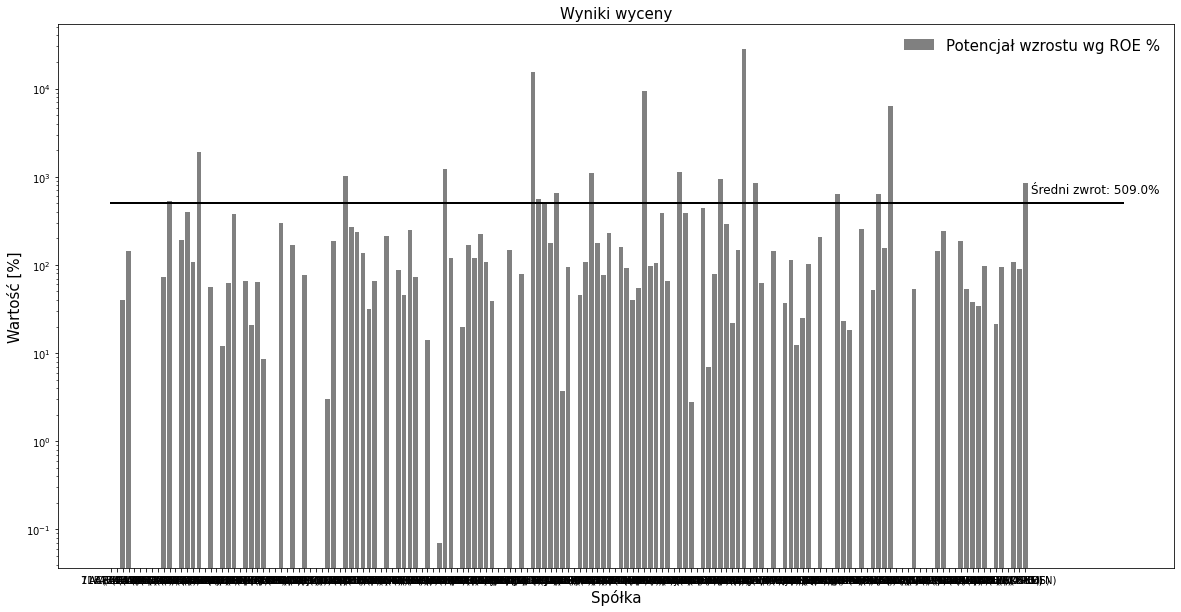

In [73]:
#Wykres osiągniętego potencjału zwrotu
plt.figure(figsize=(20, 10))
plt.bar(df['Spółka'],df['Potencjał wzrostu wg ROE %'], color = 'gray', label = 'Potencjał wzrostu wg ROE %', log=1)
plt.xticks(df['Spółka'])
plt.legend(frameon=False, fontsize=15)
plt.xlabel('Spółka', fontsize=15)
plt.ylabel('Wartość [%]', fontsize=15)
plt.title('Wyniki wyceny', fontsize=15);

#Narysowanie lini średniej
av=df['Potencjał wzrostu wg ROE %'].mean()
plt.plot([0, len(df)*1.1], [av, av], 'k-', lw=2)
txt=('Średni zwrot: {}%'.format(round(av, 0)))
plt.text(len(df)*1.07, av*1.4, txt, horizontalalignment='center', verticalalignment='center', fontsize=12)

### 3.4 Wybór najlepszych spółek

In [74]:
#Wybranie tylko spółek o największym potencjale >1000%
df[ df['Potencjał wzrostu wg ROE %'] > 1000]

,Spółka,Raport,Aktualny kurs,Liczba akcji [tys.],Średnie przepływy pieniężne [w tys. PLN],Zysk netto [%],Rynek,Sektor,Branża,Wartość księgowa na akcję 5 lat (średnio) [%],...,Potencjał wzrostu wg DCF %,Średnioroczny zwrot wg DCF %,Wartość księgowa,Wartość księgowa oczekiwana,Wartość wewnętrzna na 1 akcje wg BVM,Potencjał wzrostu wg BVM %,Średnioroczny zwrot wg BVM %,Zysk na akcje,Wartość wewnętrzna na 1 akcje ROE,Potencjał wzrostu wg ROE %
15,ATL (ATLASEST),2020/Q3,2.32,50322,104690,798.08,GPW,GPW: Deweloperzy,Nieruchomości,13.0,...,2.064797e+30,778.68,11.05,37.51,25.76,1010.34,8.35,2.30,46.76,1915.52
40,CSR (CASPAR),2020/Q4,93.00,1972,564,561.89,NC,NC: Inwestycje,Rynek kapitałowy,28.0,...,1.656508e+24,450.35,18.38,216.99,149.03,60.25,1.58,13.76,1029.39,1006.87
57,GTS (GEOTRANS),2020/Q3,19.25,5000,4355,249.49,NC,NC: Recykling,Recykling,53.0,...,1.492490e+18,246.04,3.27,229.86,157.87,720.10,7.27,2.89,255.82,1228.94
72,JRH (JRHOLDING),2020/Q3,13.60,39000,2955,27728.95,NC,NC: Inwestycje,Nieruchomości,102.0,...,7.129653e+71,21202.75,23.45,26525.07,18217.77,133854.19,27.13,22.30,2128.76,15552.65
82,KVT (KRVITAMIN),2020/Q3,19.80,12252,29660,790.83,GPW,GPW: Przemysł spożywczy,Artykuły spożywcze,18.0,...,2.248487e+29,716.07,8.72,45.64,31.35,58.33,1.54,4.55,237.60,1100.00
91,MGA (MEGASONIC),2018/Q3,0.55,2415,10,431.51,NC,NC: Technologie,Informatyka,43.0,...,1.156268e+22,366.41,5.50,196.66,135.07,24458.18,20.14,1.67,52.57,9458.18
97,MRC (MERCATOR),2020/Q3,384.00,10605,366052,43493.34,GPW,GPW: Przemysł farmaceutyczny,Sprzęt i materiały medyczne,52.0,...,7.870802e+78,36476.37,64.65,4256.03,2923.10,661.22,7.00,55.17,4712.07,1127.10
108,OPM (OPTEAM),2020/Q4,16.50,7872,18553,12216.35,GPW,GPW: Informatyka,Informatyka,39.0,...,4.840919e+62,10439.77,19.19,516.68,354.86,2050.67,10.77,30.00,4663.80,28165.45
133,SNG (SYNERGA),2020/Q3,0.25,273100,70,44048.00,NC,NC: Inwestycje,Działalność inwestycyjna,75.0,...,1.311003e+77,31809.51,0.15,40.41,27.75,11000.00,17.00,0.16,16.19,6376.00


In [75]:
#Wybranie 10 spółek o największym potencjale
df.sort_values(by = ['Potencjał wzrostu wg ROE %'], ascending=False).head(10)

,Spółka,Raport,Aktualny kurs,Liczba akcji [tys.],Średnie przepływy pieniężne [w tys. PLN],Zysk netto [%],Rynek,Sektor,Branża,Wartość księgowa na akcję 5 lat (średnio) [%],...,Potencjał wzrostu wg DCF %,Średnioroczny zwrot wg DCF %,Wartość księgowa,Wartość księgowa oczekiwana,Wartość wewnętrzna na 1 akcje wg BVM,Potencjał wzrostu wg BVM %,Średnioroczny zwrot wg BVM %,Zysk na akcje,Wartość wewnętrzna na 1 akcje ROE,Potencjał wzrostu wg ROE %
108,OPM (OPTEAM),2020/Q4,16.50,7872,18553,12216.35,GPW,GPW: Informatyka,Informatyka,39.0,...,4.840919e+62,10439.77,19.19,516.68,354.86,2050.67,10.77,30.00,4663.80,28165.45
72,JRH (JRHOLDING),2020/Q3,13.60,39000,2955,27728.95,NC,NC: Inwestycje,Nieruchomości,102.0,...,7.129653e+71,21202.75,23.45,26525.07,18217.77,133854.19,27.13,22.30,2128.76,15552.65
91,MGA (MEGASONIC),2018/Q3,0.55,2415,10,431.51,NC,NC: Technologie,Informatyka,43.0,...,1.156268e+22,366.41,5.50,196.66,135.07,24458.18,20.14,1.67,52.57,9458.18
133,SNG (SYNERGA),2020/Q3,0.25,273100,70,44048.00,NC,NC: Inwestycje,Działalność inwestycyjna,75.0,...,1.311003e+77,31809.51,0.15,40.41,27.75,11000.00,17.00,0.16,16.19,6376.00
15,ATL (ATLASEST),2020/Q3,2.32,50322,104690,798.08,GPW,GPW: Deweloperzy,Nieruchomości,13.0,...,2.064797e+30,778.68,11.05,37.51,25.76,1010.34,8.35,2.30,46.76,1915.52
57,GTS (GEOTRANS),2020/Q3,19.25,5000,4355,249.49,NC,NC: Recykling,Recykling,53.0,...,1.492490e+18,246.04,3.27,229.86,157.87,720.10,7.27,2.89,255.82,1228.94
97,MRC (MERCATOR),2020/Q3,384.00,10605,366052,43493.34,GPW,GPW: Przemysł farmaceutyczny,Sprzęt i materiały medyczne,52.0,...,7.870802e+78,36476.37,64.65,4256.03,2923.10,661.22,7.00,55.17,4712.07,1127.10
82,KVT (KRVITAMIN),2020/Q3,19.80,12252,29660,790.83,GPW,GPW: Przemysł spożywczy,Artykuły spożywcze,18.0,...,2.248487e+29,716.07,8.72,45.64,31.35,58.33,1.54,4.55,237.60,1100.00
40,CSR (CASPAR),2020/Q4,93.00,1972,564,561.89,NC,NC: Inwestycje,Rynek kapitałowy,28.0,...,1.656508e+24,450.35,18.38,216.99,149.03,60.25,1.58,13.76,1029.39,1006.87
104,NWA (NWAI),2020/Q4,20.00,1572,1881,182.60,NC,NC: Inwestycje,Rynek kapitałowy,20.0,...,1.129195e+16,194.05,9.17,56.78,39.00,95.00,2.25,4.39,210.02,950.10


In [76]:
#Skumulowany potencjal wzrostu w zależności od rynku
df \
    .groupby("Rynek")\
    .agg(suma_zwrot = ('Potencjał wzrostu wg ROE %', 'sum'))\
    .sort_values(by="suma_zwrot", ascending=False).head(10)

,suma_zwrot
Rynek,
GPW,40431.58
NC,39533.00


In [77]:
#Skumulowany potencjal wzrostu w zależności, sektora, branży
df \
    .groupby(['Rynek', 'Sektor', 'Branża'])\
    .agg(suma_zwrot = ('Potencjał wzrostu wg ROE %', 'sum'))\
    .sort_values(by="suma_zwrot", ascending=False).head(10)

suma_zwrot
Rynek Sektor                  Branża                              
GPW   GPW: Informatyka        Informatyka                 28535.04
NC    NC: Inwestycje          Nieruchomości               15552.65
      NC: Technologie         Informatyka                  9458.18
      NC: Inwestycje          Działalność inwestycyjna     6497.88
GPW   GPW: Deweloperzy        Nieruchomości                2489.03
NC    NC: Inwestycje          Rynek kapitałowy             1956.97
GPW   GPW: Przemysł spożywczy Artykuły spożywcze           1701.63
NC    NC: Informatyka         Informatyka                  1647.48
GPW   GPW: Rynek kapitałowy   Rynek kapitałowy             1523.21
NC    NC: Recykling           Recykling                    1243.10

In [78]:
#Średni potencjal wzrostu w zależności od rynku, sektora, branży
df \
    .groupby(['Rynek','Sektor','Branża'])\
    .agg(średni_zwrot = ('Potencjał wzrostu wg ROE %','mean'))\
    .sort_values(by="średni_zwrot",ascending=False).head(10)

średni_zwrot
Rynek Sektor                         Branża                                   
NC    NC: Inwestycje                 Nieruchomości                15552.650000
      NC: Technologie                Informatyka                   9458.180000
GPW   GPW: Informatyka               Informatyka                   2195.003077
NC    NC: Inwestycje                 Działalność inwestycyjna      2165.960000
GPW   GPW: Przemysł farmaceutyczny   Sprzęt i materiały medyczne   1127.100000
NC    NC: Inwestycje                 Rynek kapitałowy               978.485000
      NC: Eco-energia                Motoryzacja                    856.790000
GPW   GPW: Przemysł elektromaszynowy Budownictwo                    633.260000
NC    NC: Recykling                  Recykling                      621.550000
GPW   GPW: Rynek kapitałowy          Rynek kapitałowy               507.736667